In [1]:
import pandas as pd
import numpy as np

import pickle as pk
import xgboost as xgb
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option("display.max_rows", 8)

In [5]:
df = pd.read_pickle("../../data/df.pkl")
df

,desg,desi,desr,desz,Xaxis,desg_GP,desi_GP,desr_GP,desz_GP,wavelets,...,f14,f15,f16,f17,f18,f19,f20,type,type_bool,REDSHIFT_SPEC
ID,,,,,,,,,,,,,,,,,,,,,
SN10001,"[[0.0, 2.326, 4.792], [2.0, 4.617, 2.249], [9....","[[0.031000000002677552, 8.672, 5.439], [2.1560...","[[0.01600000000325963, 8.834, 5.339], [2.13999...","[[0.06199999999807915, 6.026, 4.693], [2.18699...","[0.0, 1.1313535353535435, 2.262707070707087, 3...","([0.0, 0.818888888888886, 1.637777777777772, 2...","([0.031000000002677552, 1.141676767679467, 2.2...","([0.01600000000325963, 1.076565656568908, 2.13...","([0.06199999999807915, 1.1927272727253795, 2.3...","[9.251771363349247, 8.972870155014132, 8.79160...",...,6.048710,-11.165995,23.954122,18.206973,6.125696,9.448978,-0.078004,II,False,0.59162
SN100023,"[[6.984000000004016, 5.679, 6.387], [7.9920000...","[[7.00800000000163, 4.698, 7.145], [8.02300000...","[[0.0, 16.04, 17.59], [6.992000000005646, 19.8...","[[4.121000000006461, 18.01, 3.601], [7.0230000...","[0.0, 1.3437474747475018, 2.6874949494950036, ...","([6.984000000004016, 8.256929292933277, 9.5298...","([7.00800000000163, 8.189737373738987, 9.37147...","([0.0, 0.8994242424242942, 1.7988484848485884,...","([4.121000000006461, 5.423121212127635, 6.7252...","[12.22728787505526, 11.357060718395505, 10.716...",...,33.710197,-11.581964,28.655932,19.743614,4.619543,37.266792,-16.596040,II,False,0.79264
SN10005,"[[10.027000000001863, 4.996, 8.081], [33.94500...","[[0.015000000006693881, 0.2977, 2.206], [18.94...","[[0.0, 1.033, 1.325], [13.015000000006694, 0.4...","[[0.03500000000349246, 1.826, 3.029], [48.875,...","[0.0, 1.0381919191919462, 2.0763838383838924, ...","([10.027000000001863, 10.782565656567513, 11.5...","([0.015000000006693881, 1.0530404040470573, 2....","([0.0, 1.0281717171717606, 2.056343434343521, ...","([0.03500000000349246, 1.0222929292964054, 2.0...","[2.000004411755352, 2.000003547336676, 2.00000...",...,-26.554909,15.768490,16.436792,17.114795,-20.292951,-24.222566,-11.295562,Ia,True,1.08327
SN10007,"[[0.0, 6.266, 10.48], [10.105999999999767, 17....","[[0.03200000000651926, 7.161, 9.313], [2.01600...","[[2.0, 1.24, 2.429], [10.121000000006461, 20.0...","[[0.9770000000062282, 0.6586, 5.329], [15.9930...","[0.0, 1.5136565656566285, 3.027313131313257, 4...","([0.0, 1.5132626262626456, 3.0265252525252913,...","([0.03200000000651926, 1.5451717171782005, 3.0...","([2.0, 3.49314141414145, 4.9862828282829, 6.47...","([0.9770000000062282, 2.480787878794107, 3.984...","[11.341091517194192, 8.812204685737349, 6.9798...",...,-99.877031,21.670852,24.155364,-26.622112,-27.616185,-19.981432,49.299250,Ia,True,0.82331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN99899,"[[15.004000000000815, 1.352, 3.403], [53.87900...","[[0.0, 4.81, 2.212], [29.9059999999954, 0.0751...","[[7.019999999996799, 2.434, 1.445], [15.027999...","[[0.023999999997613486, 3.478, 3.05], [9.03499...","[0.0, 0.8468686868686516, 1.6937373737373032, ...","([15.004000000000815, 15.689212121212893, 16.3...","([0.0, 0.8468686868686516, 1.6937373737373032,...","([7.019999999996799, 7.785939393936206, 8.5518...","([0.023999999997613486, 0.8200808080784021, 1....","[20.712009726735538, 19.059663100848315, 17.84...",...,-20.467690,98.233177,-82.338152,40.618768,53.697825,-2.771304,-35.327613,II,False,0.65243
SN99921,"[[0.0, 8.327, 4.797], [2.0, 9.834, 2.261], [9....","[[0.031000000002677552, 22.78, 5.454], [2.1560...","[[0.01600000000325963, 26.73, 5.361], [2.13999...","[[0.06199999999807915, 15.19, 4.7], [2.1869999...","[0.0, 1.2923333333333222, 2.5846666666666445, ...","([0.0, 1.1299292929293416, 2.2598585858586833,...","([0.031000000002677552, 1.3230202020228414, 2....","([0.01600000000325963, 1.3080606060638358, 2.6...","([0.06199999999807915, 1.2726666666647435, 2.4...","[14.025137598441496, 16.23859348218353, 17.966...",...,30.582545,-38.454611,33.695746,32.105615,-3.304444,32.695392,-16.237457,II,False,0.69650
SN99946,"[[11.961000000002969, 1.5

In [3]:
df.loc[df.type_bool == True]

,desg,desi,desr,desz,Xaxis,desg_GP,desi_GP,desr_GP,desz_GP,wavelets,...,f14,f15,f16,f17,f18,f19,f20,type,type_bool,REDSHIFT_SPEC
ID,,,,,,,,,,,,,,,,,,,,,
SN10005,"[[10.027000000001863, 4.996, 8.081], [33.94500...","[[0.015000000006693881, 0.2977, 2.206], [18.94...","[[0.0, 1.033, 1.325], [13.015000000006694, 0.4...","[[0.03500000000349246, 1.826, 3.029], [48.875,...","[0.0, 1.0381919191919462, 2.0763838383838924, ...","([10.027000000001863, 10.782565656567513, 11.5...","([0.015000000006693881, 1.0530404040470573, 2....","([0.0, 1.0281717171717606, 2.056343434343521, ...","([0.03500000000349246, 1.0222929292964054, 2.0...","[2.000004411755352, 2.000003547336676, 2.00000...",...,-26.554909,15.768490,16.436792,17.114795,-20.292951,-24.222566,-11.295562,Ia,True,1.08327
SN10007,"[[0.0, 6.266, 10.48], [10.105999999999767, 17....","[[0.03200000000651926, 7.161, 9.313], [2.01600...","[[2.0, 1.24, 2.429], [10.121000000006461, 20.0...","[[0.9770000000062282, 0.6586, 5.329], [15.9930...","[0.0, 1.5136565656566285, 3.027313131313257, 4...","([0.0, 1.5132626262626456, 3.0265252525252913,...","([0.03200000000651926, 1.5451717171782005, 3.0...","([2.0, 3.49314141414145, 4.9862828282829, 6.47...","([0.9770000000062282, 2.480787878794107, 3.984...","[11.341091517194192, 8.812204685737349, 6.9798...",...,-99.877031,21.670852,24.155364,-26.622112,-27.616185,-19.981432,49.299250,Ia,True,0.82331
SN100361,"[[6.957000000002154, 16.02, 23.92], [7.9690000...","[[0.023000000001047738, 4.903, 3.324], [6.9840...","[[0.0, 0.7103, 2.626], [5.9760000000023865, 5....","[[8.055000000000291, 2.567, 2.665], [15.035000...","[0.0, 1.3031111111111275, 2.606222222222255, 3...","([6.957000000002154, 8.15910101010318, 9.36120...","([0.023000000001047738, 1.315494949496019, 2.6...","([0.0, 1.3026767676768058, 2.6053535353536117,...","([8.055000000000291, 9.27674747474778, 10.4984...","[8.233549869515556, 9.464488874691614, 10.4511...",...,102.074783,-95.727930,4.861555,-29.749073,23.442440,5.441237,12.503390,Ia,True,0.90012
SN100471,"[[0.0, 3.79, 4.764], [11.969000000004598, 1.67...","[[0.023999999997613486, 2.202, 3.146], [3.0429...","[[0.008000000001629815, 0.4567, 2.129], [3.004...","[[0.046999999998661224, 6.92, 2.486], [3.07500...","[0.0, 1.4638181818181601, 2.9276363636363203, ...","([0.0, 1.3621414141414037, 2.7242828282828073,...","([0.023999999997613486, 1.4875757575733735, 2....","([0.008000000001629815, 1.3701818181834458, 2....","([0.046999999998661224, 1.3283737373723963, 2....","[5.63245418874034, 5.603687474301877, 5.594769...",...,-40.831628,28.629443,12.801879,-0.555542,13.065768,-21.776767,9.358561,Ia,True,0.92640
SN100490,"[[0.0, 0.01278, 2.833], [8.11699999999837, 1.7...","[[0.026999999994586688, 1.849, 5.434], [8.1449...","[[15.0, 0.4107, 4.054], [46.042999999997846, 6...","[[1.1679999999978463, 1.572, 6.291], [49.96899...","[0.0, 0.7267979797979933, 1.4535959595959866, ...","([0.0, 0.5955656565656131, 1.1911313131312262,...","([0.026999999994586688, 0.7435858585804729, 1....","([15.0, 15.565262626262582, 16.130525252525164...","([1.1679999999978463, 1.8829999999978817, 2.59...","[8.351889035545303, 8.47302530763294, 8.594179...",...,-36.484191,38.259352,-88.907842,76.656123,50.003481,-5.379145,-57.678266,Ia,True,0.73814
SN100873,"[[2.989000000001397, 0.5457, 2.584], [4.067000...","[[3.0349999999962165, 0.2754, 1.984], [4.09799...","[[0.0, 2.085, 2.13], [2.995999999999185, 2.824...","[[0.03899999999703141, 1.145, 2.483], [3.06700...","[0.0, 1.6553030303030303, 3.3106060606060606, ...","([2.989000000001397, 4.532949494950842, 6.0768...","([3.0349999999962165, 4.659646464642719, 6.284...","([0.0, 1.5742626262626156, 3.148525252525231, ...","([0.03899999999703141, 1.6133030303000593, 3.1...","[7.78219884034335, 7.41394860426453, 7.1531623...",...,-60.402141,48.050828,-16.963718,-4.547151,-15.290471,-32.740604,-9.195974,Ia,True,0.88256
SN100878,"[[4.960999999995693, 25.9, 18.69], [5.00799999...","[[26.995999999999185, 4.963, 5.47], [34.991999...","[[14

## Analysing different features to input on the best algorithm which is: 

In [4]:
regressor = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
X = df.loc[:,'f1':'f20']
y = np.array(df.REDSHIFT_SPEC)
ans_real_19 = linear_regression(X, y, int(len(df)/1100), 5, regressor)
ans_real_2 = linear_regression(X, y, 2, 5, regressor)
ans_normal = normal_linear_regression(X, y, 5, regressor)
evaluate(ans_real_19, ans_real_2, ans_normal)

NameError: name 'linear_regression' is not defined

##### Note: all functions declared on last notebook cell

In [52]:
from sklearn import preprocessing
cols = ['f1', 'f2','f3', 'f4','f5','f6', 'f7','f8', 'f9','f10','f11', 'f12','f13', 'f14','f15','f16', 'f17','f18', 'f19','f20']
#Robust Scaler
scaler = preprocessing.RobustScaler()
df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X, index = df.index, columns=cols)
#MinMax Scaler
scaler_mM = preprocessing.MinMaxScaler()
df_scaled_twice = scaler_mM.fit_transform(df_scaled)
df_scaled_twice = pd.DataFrame(df_scaled_twice, index = df.index, columns = cols)
#MinMax Only
scaler_mMo = preprocessing.MinMaxScaler()
df_scaled_mM = scaler_mMo.fit_transform(X)
df_scaled_mM = pd.DataFrame(df_scaled_mM, index = df.index, columns = cols)

In [56]:
df.f1.describe()

count    2.129100e+04
mean    -1.626676e-13
std      4.190310e+03
min     -8.630367e+02
25%     -5.959877e+02
50%     -3.933431e+02
75%     -1.070479e+02
max      4.663863e+05
Name: f1, dtype: float64

In [78]:
results, bin_edges = pd.qcut(df.f1, q=15, retbins = True)
results_table = pd.DataFrame(zip(bin_edges), columns=['Thresholds'])
results_table

,Thresholds
0,-863.036718
1,-687.442935
2,-657.062160
3,-624.711223
...,...
12,18.630718
13,312.921263
14,999.794292
15,466386.293481


In [ ]:
PAREI AQUI NESSE LINK: 
    https://pbpython.com/pandas-qcut-cut.html

In [79]:
df.describe(include='category')

ValueError: No objects to concatenate

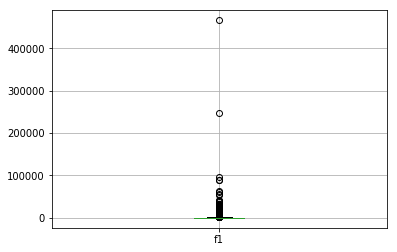

In [58]:
df.boxplot(column = ['f1'])

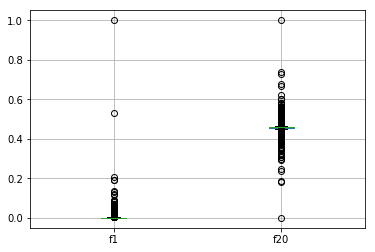

In [55]:
df_scaled_mM.boxplot(column = ['f1','f20'])

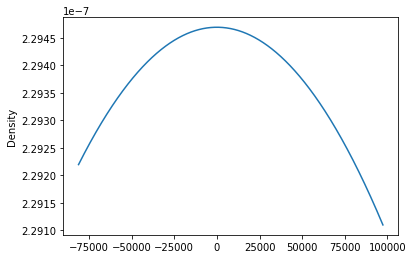

In [64]:
df_scaled.f4.plot.kde(bw_method=2550)

In [12]:
len(df['wavelets'].iloc[0])

1600

In [14]:
type(df.loc[:,'f1':'f20'])

pandas.core.frame.DataFrame

In [59]:
import pywt as wt

In [61]:
help(wt.swt)

Help on function swt in module pywt._swt:

swt(data, wavelet, level=None, start_level=0, axis=-1, trim_approx=False, norm=False)
    Multilevel 1D stationary wavelet transform.
    
    Parameters
    ----------
    data :
        Input signal
    wavelet :
        Wavelet to use (Wavelet object or name)
    level : int, optional
        The number of decomposition steps to perform.
    start_level : int, optional
        The level at which the decomposition will begin (it allows one to
        skip a given number of transform steps and compute
        coefficients starting from start_level) (default: 0)
    axis: int, optional
        Axis over which to compute the SWT. If not given, the
        last axis is used.
    trim_approx : bool, optional
        If True, approximation coefficients at the final level are retained.
    norm : bool, optional
        If True, transform is normalized so that the energy of the coefficients
        will be equal to the energy of ``data``. In other w

In [60]:
help(wt.dwt)

Help on function dwt in module pywt._dwt:

dwt(data, wavelet, mode='symmetric', axis=-1)
    dwt(data, wavelet, mode='symmetric', axis=-1)
    
    Single level Discrete Wavelet Transform.
    
    Parameters
    ----------
    data : array_like
        Input signal
    wavelet : Wavelet object or name
        Wavelet to use
    mode : str, optional
        Signal extension mode, see :ref:`Modes <ref-modes>`.
    axis: int, optional
        Axis over which to compute the DWT. If not given, the
        last axis is used.
    
    Returns
    -------
    (cA, cD) : tuple
        Approximation and detail coefficients.
    
    Notes
    -----
    Length of coefficients arrays depends on the selected mode.
    For all modes except periodization:
    
        ``len(cA) == len(cD) == floor((len(data) + wavelet.dec_len - 1) / 2)``
    
    For periodization mode ("per"):
    
        ``len(cA) == len(cD) == ceil(len(data) / 2)``
    
    Examples
    --------
    >>> import pywt
    >>> (cA, 

In [4]:
def divide_validation(X, y, splits):
    """
    Divides DF in {splits} splits, in order to destinate ~ 1100 to normal 80-20 train and test.
    Then we Validate with the ~ {len(df) - splits} lines
    """
    kf = KFold(n_splits = splits)
    X_validate = [] # List with Xs to validate
    X_train_test = []  # List with Xs to train and test
    y_validate = [] # List with ys to validate
    y_train_test = []  # List with ys to train and test

    for train_index_real, test_index_real in kf.split(X):
        #print("X_validate:", train_index_real, "X_train_test:", test_index_real)
        X_validate.append(X.iloc[train_index_real])
        X_train_test.append(X.iloc[test_index_real])
        y_validate.append(y[train_index_real])
        y_train_test.append(y[test_index_real])

    return (X_train_test, X_validate, y_train_test, y_validate)

def Kfold(X, y, splits):
    """
    Normal K-Fold
    """
    kf = KFold(n_splits = splits)
    X_train, X_test, y_train, y_test = [], [], [], []

    for train_index, test_index in kf.split(X):
        X_train.append(X.iloc[train_index])
        X_test.append(X.iloc[test_index])
        y_train.append(y[train_index])
        y_test.append(y[test_index])
    return (X_train, X_test, y_train, y_test)

def linear_regression(X, y, splits_validation, splits_KFold, regressor):
    """
    Divides DF in splits_validation splits, in order to destinate ~ 1100 to ordinary K-Fold 80-20 train and test.
    Then we Validate with the other rows
    It saves the specific elemnts that will be analysed in a dict format.
    Returns a list of dict with specified keys. Each element corresponds to one K-Fold test inside a splits_validation group. List
    lenght is equal to splits_validation * splits_KFold.
    
    Args:
        X (pandas.core.frame.DataFrame) : Data Frame with colunmns as features and rows as objects (Training data)
        y (numpy.ndarray) : Target values 
        splits_validation (int) : Number of Validation splits, it will divide entire data in splits_validation (it should be int(len(df)/1100))
        splits_KFold (int) : Number of K-Folds splits
        regressor (xgboost.sklearn.XGBRegressor) : Regressor parameter from XGBoost
        
    Returns:
        list: return list of dict with specified keys. Each element corresponds to one K-Fold test inside a splits_validation group.
        
    """
    ans = []
    X_train_test, X_validate, y_train_test, y_validate = divide_validation(X, y, splits_validation)
    for i in range(len(X_validate)):
        X_train, X_test, y_train, y_test = Kfold(X_train_test[i], y_train_test[i], splits_KFold)
        for j in range(len(X_train)):
            element = dict.fromkeys(['preds_arr','rmse_arr','mae_arr','r2_arr','matrices_arr','true_preds','true_rms','true_mae','true_r2','models'])
            
            regressor.fit(X_train[j],y_train[j]) #Overwrites last data, do not do Incremental learning
            #print("Fitting " + str(j+1) + 'th model from ' + str(i+1) + 'th validation' )
            element['preds_arr'] = regressor.predict(X_test[j])
            element['rmse_arr'] = np.sqrt(mean_squared_error(y_test[j], element['preds_arr']))
            element['mae_arr'] = mean_absolute_error(y_test[j], element['preds_arr'])
            element['r2_arr'] = r2_score(y_test[j], element['preds_arr'])
            element['matrices_arr'] = np.round((abs(y_test[j]-element['preds_arr'])/y_test[j])*100)
            
            element['true_preds'] = regressor.predict(X_validate[i])
            element['true_rms'] = np.sqrt(mean_squared_error(y_validate[i], element['true_preds'])) # RMES -> Aumenta com maiores variancia
            element['true_mae'] = mean_absolute_error(y_validate[i], element['true_preds'])          # MAE -> Nao varia com variancia
            element['true_r2'] = r2_score(y_validate[i], element['true_preds'])
            element['models'] = regressor
            ans.append(element)         
    return ans

def normal_linear_regression(X, y, splits_KFold, regressor):
    """
    Normal XGBoost linear regressions, dividing the entire Data Set as 80/20 train/test K-Fold. Without Validation.
    It saves the specific elemtns that will be analysed in a dict format.
    
    Args:
        X (pandas.core.frame.DataFrame) : Data Frame with colunmns as features and rows as objects (Training data)
        y (numpy.ndarray) : Target values 
        splits_KFold (int) : Number of K-Folds splits
        regressor (xgboost.sklearn.XGBRegressor) : Regressor parameter from XGBoost
        
    Returns:
        list: return list of dict with specified keys. Each element corresponds to one K-Fold test.    
    """
    ans = []
    X_train, X_test, y_train, y_test = Kfold(X, y, splits_KFold)
    for j in range(len(X_train)):
        element = dict.fromkeys(['preds_arr','rmse_arr','mae_arr','r2_arr','matrices_arr','models'])
        regressor.fit(X_train[j],y_train[j]) #Overwrites last data, do not do Incremental learning
        #print("Fitting " + str(j+1) + 'th model from ' + str(i+1) + 'th validation' )
        element['preds_arr'] = regressor.predict(X_test[j])
        element['rmse_arr'] = np.sqrt(mean_squared_error(y_test[j], element['preds_arr']))
        element['mae_arr'] = mean_absolute_error(y_test[j], element['preds_arr'])
        element['r2_arr'] = r2_score(y_test[j], element['preds_arr'])
        element['matrices_arr'] = np.round((abs(y_test[j]-element['preds_arr'])/y_test[j])*100)

        element['models'] = regressor
        ans.append(element)         
    return ans

def evaluate(ans_real_19, ans_real_2, ans_normal):
    """
    TODO
    """
    # def list_and_mean(ans, key):
    #     #list_ = np.array([i[key] for i in ans])
    #     return np.array([i[key] for i in ans]) , np.mean(np.array([i[key] for i in ans]))
    list_and_mean = lambda ans, key : (np.array([i[key] for i in ans]) , np.mean(np.array([i[key] for i in ans])))
    l_19, mean_19 = list_and_mean(ans_real_19, 'true_rms')
    l_2, mean_2 = list_and_mean(ans_real_2, 'true_rms')
    l, mean = list_and_mean(ans_normal, 'rmse_arr')
    print(" RMSE Means : \n", 
         "\n Validate 19: ", mean_19,
         "\n Validate 2: ", mean_2,
         "\n No Validation: ", mean)
    l_19, mean_19 = list_and_mean(ans_real_19, 'true_mae')
    l_2, mean_2 = list_and_mean(ans_real_2, 'true_mae')
    l, mean = list_and_mean(ans_normal, 'mae_arr')
    print("\n MAE Means : \n", 
         "\n Validate 19: ", mean_19,
         "\n Validate 2: ", mean_2,
         "\n No Validation: ", mean)
    l_19, mean_19 = list_and_mean(ans_real_19, 'true_r2')
    l_2, mean_2 = list_and_mean(ans_real_2, 'true_r2')
    l, mean = list_and_mean(ans_normal, 'r2_arr')
    print("\n R2 Means : \n", 
         "\n Validate 19: ", mean_19,
         "\n Validate 2: ", mean_2,
         "\n No Validation: ", mean)